<a href="https://colab.research.google.com/github/yankeqiang/Datawhale/blob/master/Copy_of_homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130824 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&acces

In [0]:
# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#指定当前工作路径
import os
os.chdir("drive/Colab Notebooks/DataWhale")

In [0]:
import numpy as np
import pandas as pd

In [5]:
# 导入数据
data = pd.read_csv(r"data2.csv",encoding="gbk")
# 将显示的最大列数设置成100，以展示全部列
pd.set_option("max_columns", 100)
# 抽样查看数据
data.sample(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
1577,4062,1784109,20180507124038160000000388387258,卡号1,0.00,1.00,200,1.04,0.81,0.252,15.0,23.0,14.0,3.0,1.0,9890,0,25.0,20150817.0,192050,139.0,0.60,24610,8.0,2700,0.40,1240,0.50,一线城市,5.0,23.0,5.0,26.0,0.0,0.0,2.0,2.0,0.0,500,9.0,0.0,0,1500,0.0,0,xs,1008.0,91.0,郭敏莉,662.0,78.0,17.0,11.0,5.0,25.0,2018-04-24,4.0,14.0,20.0,635.0,74.0,61.0,58.0,0.0,16.0,5.0,11.0,0.0,4.0,24.0,85.0,6.0,0.0,0.0,356.0,2018-03-14,2200.0,71.0,11.0,11.0,4100.0,1663.0,20600.0,80.0,5.0,5.0,24000.0,15480.0,13.0,54.0
290,743,2396979,20180507122736372000000388336607,卡号1,0.01,0.99,0,4.82,1.00,0.466,17.0,16.0,15.0,2.0,NaN,13140,0,10.0,20170504.0,168360,140.0,0.50,39850,5.0,4170,0.15,960,0.55,一线城市,9.0,16.0,9.0,16.0,0.0,0.0,2.0,2.0,813482.0,520,5.0,0.0,450,9880,0.0,0,xs,382.0,86.0,戴凌,644.0,77.0,9.0,2.0,4.0,10.0,2018-04-13,1.0,2.0,4.0,622.0,74.0,47.0,46.0,0.0,11.0,4.0,7.0,0.0,2.0,22.0,46.0,2.0,0.0,0.0,340.0,2018-03-23,1100.0,73.0,7.0,7.0,1600.0,1157.0,11300.0,79.0,4.0,4.0,13800.0,9000.0,24.0,45.0
3239,8112,500503,20180504155429742000000381243911,卡号1,0.02,0.87,33800,0.03,0.72,0.441,21.0,18.0,11.0,4.0,1.0,6400,0,29.0,20141129.0,143830,251.0,0.55,17780,5.0,21950,0.30,1260,0.50,三线城市,7.0,18.0,4.0,18.0,0.0,0.0,1.0,1.0,0.0,690,3.0,0.0,490,22730,0.0,0,xs,1269.0,82.0,苏玉含,638.0,80.0,7.0,3.0,1.0,11.0,2018-04-22,6.0,8.0,11.0,612.0,75.0,15.0,14.0,0.0,8.0,2.0,6.0,1.0,3.0,9.0,18.0,1.0,2.0,0.0,329.0,2018-04-11,2600.0,73.0,6.0,6.0,5300.0,2566.0,1000.0,79.0,2.0,3.0,1000.0,1000.0,12.0,23.0
420,1027,2928999,20180507120222483000000388235787,卡号1,0.01,0.99,0,0.08,0.59,0.448,16.0,36.0,14.0,3.0,NaN,12990,0,33.0,20130703.0,157560,195.0,0.60,32220,6.0,7340,0.40,1390,0.45,一线城市,19.0,22.0,19.0,22.0,0.0,0.0,2.0,2.0,0.0,1010,3.0,0.0,0,23420,0.0,0,xs,1783.0,83.0,黄忠福,681.0,77.0,23.0,12.0,5.0,35.0,2018-05-05,10.0,17.0,23.0,671.0,77.0,50.0,43.0,0.0,19.0,6.0,13.0,5.0,9.0,28.0,50.0,8.0,5.0,0.0,347.0,2018-05-03,1700.0,75.0,13.0,15.0,2300.0,1523.0,15800.0,83.0,6.0,7.0,40800.0,17150.0,2.0,4.0
3489,8795,2872906,20180504182529378000000381869223,卡号1,0.

In [6]:
data.drop(columns=["trade_no","bank_card_no","id_name","source"], axis=1, inplace=True)
data.select_dtypes(include="object").columns

Index(['reg_preference_for_trad', 'latest_query_time', 'loans_latest_time'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["reg_preference_for_trad"] = lb.fit_transform(data["reg_preference_for_trad"].astype(str))
data["reg_preference_for_trad"].value_counts()

1    3403
2    1064
5     150
3     131
4       4
0       2
Name: reg_preference_for_trad, dtype: int64

In [0]:
data['latest_query_time'] = (pd.to_datetime(data['latest_query_time']) - pd.to_datetime('today')).apply(lambda col: col.days)
data['loans_latest_time'] = (pd.to_datetime(data['loans_latest_time']) - pd.to_datetime('today')).apply(lambda col: col.days)

In [0]:
# Unnamed: 0 为序号需要删除，custid为用户id需要删除
data.drop(columns=["Unnamed: 0","custid"], axis=1, inplace=True)

In [10]:
data.isnull().sum().argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'student_feature'

In [0]:
data["student_feature"].fillna(value=0,inplace=True)

In [0]:
def desc(df):
    loss_num=[] #缺失值的数量
    valid_num=[] #非缺失值的数量
    unique_num=[] #唯一的数量
    unique_percent=[] #唯一率
    for i,j in enumerate (df.columns): # enumerator 函数可以同时获得索引和值。 i表示索引，j表示值
        loss_num.append(df[df[j].isnull()].shape[0]) #isnull() 表示的是空 返回的是True（空）
        valid_num.append(df[df[j].notnull()].shape[0])
        unique_num.append(len(df[j].unique()))
        unique_percent.append(len(df[df[j].notnull()][j].unique())/df[df[j].notnull()].shape[0])
    data_desc = pd.DataFrame({"loss_num":loss_num,"valid_num":valid_num,"unique_num":unique_num,"unique_percent":unique_percent},index=df.columns)
    return data_desc
data_count = desc(data)
data_count

In [12]:
display(data.shape)
data.dropna(thresh=49,inplace=True)
# data.info()
data["status"].isnull().any()
display(data.shape)
data.isnull().sum(axis=1).value_counts()

(4754, 84)

(4476, 84)

0     3983
1      385
2       37
11      22
31      12
30       8
3        7
4        7
12       5
10       3
5        3
15       1
6        1
13       1
32       1
dtype: int64

In [0]:
data["cross_consume_count_last_1_month"].fillna(value=0,inplace=True)

In [0]:
data.fillna(data.mean(),inplace=True)

In [15]:
data.drop(data.columns[data.std()==0],axis=1,inplace=True)
data.shape

(4476, 84)

In [0]:
y = data["status"]
data.drop(["status"], axis=1, inplace=True)
x = data

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(3133, 83)

(1343, 83)

(3133,)

(1343,)

1.对数据进行标准化处理

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


利用accuracy、precision, recall和F1-score，auc值对模型进行评分，并绘制ROC曲线

In [0]:
#引入要用到的评价函数
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [0]:
#得分和ROC曲线绘制  参考20同学的脚本
def get_scores(y_true, y_predicet, y_predict_pro):
    acc_score = accuracy_score(y_true,y_predicet)
    pre_score = precision_score(y_true,y_predicet)
    recall = recall_score(y_true,y_predicet)
    F1 = f1_score(y_true,y_predicet)
    auc_score = roc_auc_score(y_true,y_predict_pro)#直接求AUC值
    fpr, tpr, thresholds = roc_curve(y_test,y_predict_pro)#求ROC
    plt.plot(fpr,tpr,'b',label='AUC = %0.4f'% auc_score)
    plt.plot([0,1],[0,1],'r--',label= 'Random guess')
    plt.legend(loc='lower right')
    plt.title('ROCcurve')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()
    print('准确率：',acc_score)
    print('精确率：',pre_score)
    print('召回率：',recall)
    print('F1-score:',F1)
    print('AUC',auc_score)

利用逻辑回归进行分析

In [22]:
#调参
from time import time
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
times = time()
parameters = {'penalty':['l1','l2'],
             'C':np.linspace(0.05,1,19)}
lr = LR().fit(x_train,y_train)
GS = GridSearchCV(lr, parameters, cv=10)
GS.fit(x_train,y_train)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

时间:04:56:174503


In [23]:
GS.best_params_

{'C': 0.36666666666666664, 'penalty': 'l1'}

In [24]:
GS.best_score_

0.7947654005745292

In [25]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C=0.1028).fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5398361876396128

              precision    recall  f1-score   support

           0       0.49      0.82      0.61       591
           1       0.69      0.32      0.44       752

   micro avg       0.54      0.54      0.54      1343
   macro avg       0.59      0.57      0.52      1343
weighted avg       0.60      0.54      0.51      1343



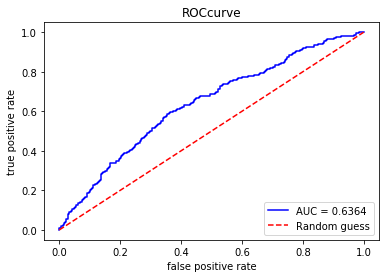

准确率： 0.5398361876396128
精确率： 0.3191489361702128
召回率： 0.6936416184971098
F1-score: 0.43715846994535523
AUC 0.6364411152532743



In [26]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(x_train_sc, y_train)
y_pre_lr = lr.predict(x_test_sc)
display(accuracy_score(y_pre_lr, y_test))
print(classification_report(y_pre_lr, y_test))
lr_predict_pro = lr.predict_proba(x_test_sc)[:,1]#预测标签为1的概率
get_scores(y_test,y_pre_lr,lr_predict_pro)
print('')

利用SVM进行分类

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_linear = svm.SVC(kernel = 'linear', probability=True)
param = {'C':[0.01,0.1,1]}
gsearch = GridSearchCV(svm_linear, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(x_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

In [0]:
from sklearn.svm import SVC
print('SVM：')
svc = SVC()
svc.fit(x_train_sc, y_train)
y_pre_svc = svc.predict(x_test_sc)
display(accuracy_score(y_pre_svc, y_test))
print(classification_report(y_pre_svc, y_test))
svc_predict_pro = svc.decision_function(x_test_sc)
get_scores(y_test,y_pre_svc,svc_predict_pro)
print('')

利用决策树进行分类

In [0]:
from sklearn.tree import DecisionTreeClassifier
times = time()
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=5)
GS.fit(x_train,y_train)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

0.5778108711839166

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       786
           1       0.49      0.30      0.37       557

   micro avg       0.58      0.58      0.58      1343
   macro avg       0.55      0.54      0.53      1343
weighted avg       0.56      0.58      0.55      1343



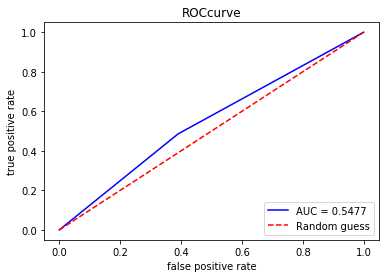

准确率： 0.5778108711839166
精确率： 0.3016157989228007
召回率： 0.48554913294797686
F1-score: 0.3720930232558139
AUC 0.5476893107066865



In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_sc, y_train)
y_pre_dtc = dtc.predict(x_test_sc)
display(accuracy_score(y_pre_dtc, y_test))
print(classification_report(y_pre_dtc, y_test))
clf_predict_proba = dtc.predict_proba(x_test_sc)[:,1]
get_scores(y_test,y_pre_dtc,clf_predict_proba)
print('')

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90).fit(Xtrain,Ytrain)
    Ytest_pred = rfc.predict(Xtest)
    score = metrics.accuracy_score(Ytest,Ytest_pred)
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [0]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=111,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(Xtrain,Ytrain)

利用随机森林进行分类

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5778108711839166

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       786
           1       0.49      0.30      0.37       557

   micro avg       0.58      0.58      0.58      1343
   macro avg       0.55      0.54      0.53      1343
weighted avg       0.56      0.58      0.55      1343



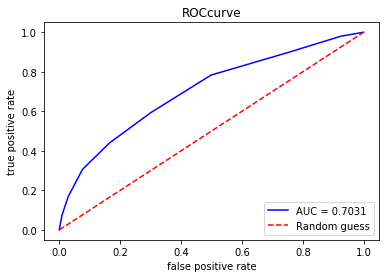

准确率： 0.5778108711839166
精确率： 0.3016157989228007
召回率： 0.48554913294797686
F1-score: 0.3720930232558139
AUC 0.7030585977585937



In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sc, y_train)
y_pre_rf = dtc.predict(x_test_sc)
display(accuracy_score(y_pre_rf, y_test))
print(classification_report(y_pre_rf, y_test))
rfc_predict_proba = rf.predict_proba(x_test_sc)[:,1]
get_scores(y_test,y_pre_rf,rfc_predict_proba)
print('')

利用XGBoost进行分类

In [0]:
from xgboost import XGBClassifier as XGBC
times = time()
parameters = {'booster':["gbtree","gblinear","dart"],
              'reg_alpha':[0,0.1,0.5,1.0],
              'gamma':[0,0.05,0.1,0.3,0.5],
              'learning_rate':[0.01,0.015,0.025,0.05,0.1]}
xgbc = XGBC(cache_size = 5000).fit(Xtrain,Ytrain)
GS = GridSearchCV(xgbc, parameters, cv=5)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

0.7922561429635145

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1218
           1       0.28      0.77      0.41       125

   micro avg       0.79      0.79      0.79      1343
   macro avg       0.62      0.78      0.64      1343
weighted avg       0.91      0.79      0.83      1343



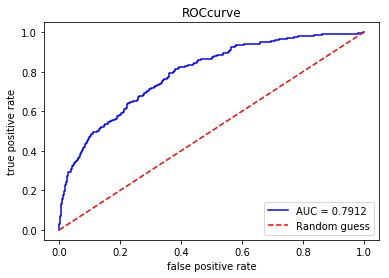

准确率： 0.7922561429635145
精确率： 0.768
召回率： 0.2774566473988439
F1-score: 0.4076433121019108
AUC 0.7912320777360984



In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_sc, y_train)
y_pre_xgb = xgb.predict(x_test_sc)
display(accuracy_score(y_pre_xgb, y_test))
print(classification_report(y_pre_xgb, y_test))
gdbt_predict_proba = xgb.predict_proba(x_test_sc)[:,1]
get_scores(y_test,y_pre_xgb,gdbt_predict_proba)
print('')